In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\HP\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df_job_country_salary=df.pivot_table(values='salary_year_avg' ,index='job_country',columns='job_title_short', aggfunc='median')

In [18]:
top_countries=df['job_country'].value_counts().head(5)
top_countries

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

In [11]:
df_job_top_country_salary = df_job_country_salary.loc[top_countries.index]

In [17]:
df_job_top_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0


In [13]:
THREE_JOBS=['Data Analyst', 'Data Engineer', 'Data Scientist']
df_THREEjob_topcountry_salary= df_job_top_country_salary[THREE_JOBS]

In [20]:
df_THREEjob_topcountry_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0


In [23]:
df_final=df_THREEjob_topcountry_salary.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')



KeyError: 'salary_year_avg'

In [24]:
# Filter for the three job titles
filtered_df = df[df['job_title_short'].isin(['Data Analyst', 'Data Engineer', 'Data Scientist'])]

# Find top 6 countries by job posting count
top_countries = (
    filtered_df['job_country']
    .value_counts()
    .head(6)
    .index
)

# Filter for top 6 countries
filtered_top = filtered_df[filtered_df['job_country'].isin(top_countries)]

# Create a pivot table for median salary_year_avg
pivot = pd.pivot_table(
    filtered_top,
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median')

In [25]:
pivot

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
India,100500.0,147500.0,114008.0
Spain,91977.0,133000.0,88128.0
United Kingdom,87750.0,110000.0,105300.0
United States,90000.0,125000.0,130000.0


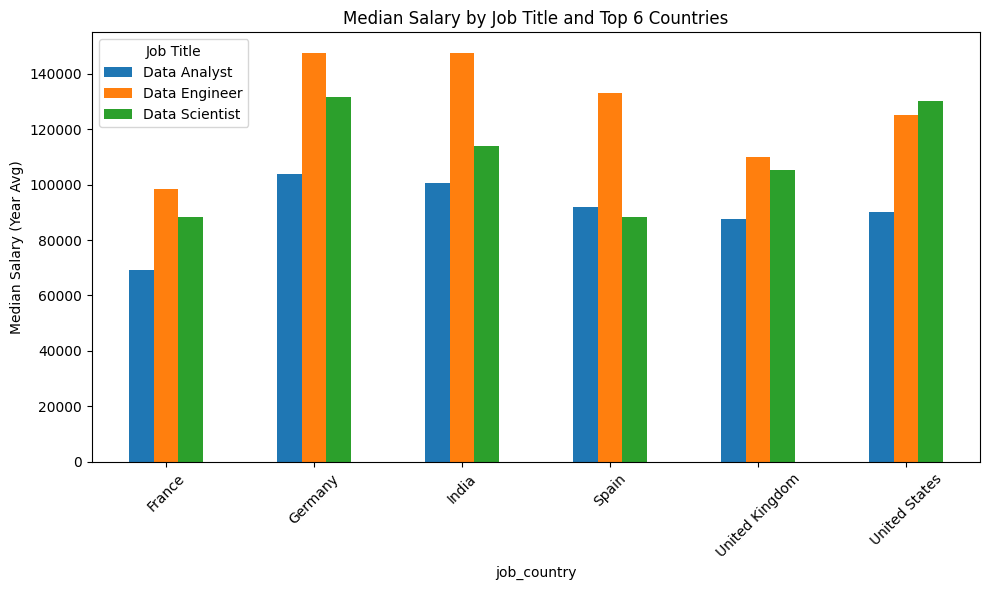

In [26]:
# Plot the pivot table as a bar diagram
pivot.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Median Salary (Year Avg)')
plt.title('Median Salary by Job Title and Top 6 Countries')
plt.xticks(rotation=45)
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

In [28]:
filtered_df = df[df['job_title_short'].isin(['Data Analyst', 'Data Engineer', 'Data Scientist'])]
filtered_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),"['excel', 'word', 'outlook']","{'analyst_tools': ['excel', 'word', 'outlook']}"
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"['nosql', 'mongodb', 'mongodb', 'python', 'ela...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"['python', 'c#', 'java', 'scala', 'sql', 'post...","{'cloud': ['azure', 'databricks'], 'databases'..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
